In [1]:
import pandas as pd

GOOG = '/kaggle/input/google-stock-data/GOOGL.csv'
df = pd.read_csv(filepath_or_buffer=GOOG, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df['dollars'] = 0.5 * (df['High'] + df['Low']) * df['Volume']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,dollars
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,2004,2.235413e+09
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,2004,1.197603e+09
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,2004,1.016651e+09
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,2004,8.210134e+08
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,2004,4.872075e+08


Before we start our exploration let's look at the price correlations.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].corr()

,Open,High,Low,Close,Adj Close
Open,1.000000,0.999915,0.999902,0.999808,0.999808
High,0.999915,1.000000,0.999877,0.999903,0.999903
Low,0.999902,0.999877,1.000000,0.999914,0.999914
Close,0.999808,0.999903,0.999914,1.000000,1.000000
Adj Close,0.999808,0.999903,0.999914,1.000000,1.000000


In [3]:
df['year'].max() - df['year'].min(), df.shape

(18, (4431, 9))

We have nearly two decades of daily quotes, more than 4000 days, but the correlation between the closing prices and the adjusted closing prices is 1.0; this means the adjusted closing prices aren't telling us anything more than what the closing prices are telling us, so we can ignore them.

<Axes: xlabel='Date', ylabel='Close'>

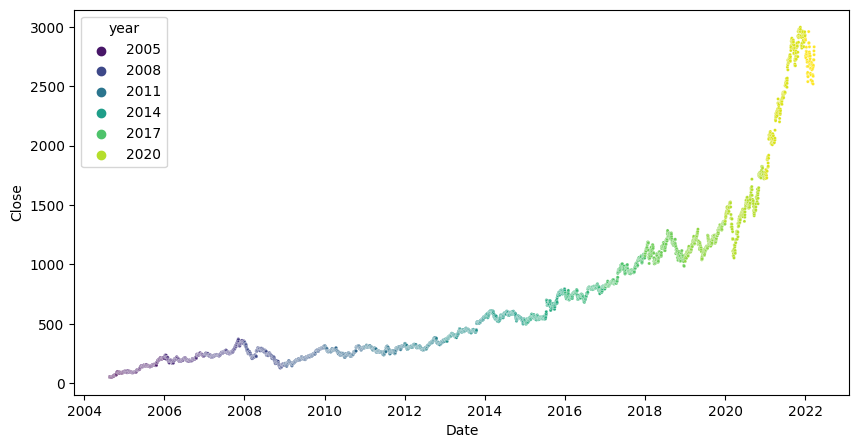

In [4]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis', s=5)

Buying and holding Google stock would have made a lot of money over the period of interest, but not without repeated reversals. Let's look at the quarterly average and see how much smoother it is.

<Axes: xlabel='Date', ylabel='Close'>

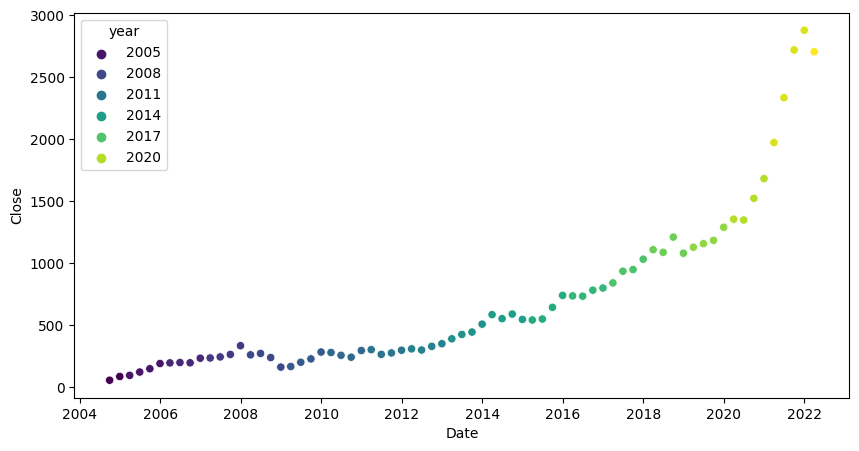

In [5]:
plt.figure(figsize=(10, 5))
scatterplot(data=df[['Date', 'Close', 'year']].set_index('Date').resample('QE').mean().reset_index(), x='Date', y='Close', hue='year', palette='viridis')

Let's have a look at the volume as a function of the volume. Because each share of stock becomes substantially more valuable on a dollar basis over time, we expect volume to decrease as price rises.

<Axes: xlabel='Close', ylabel='Volume'>

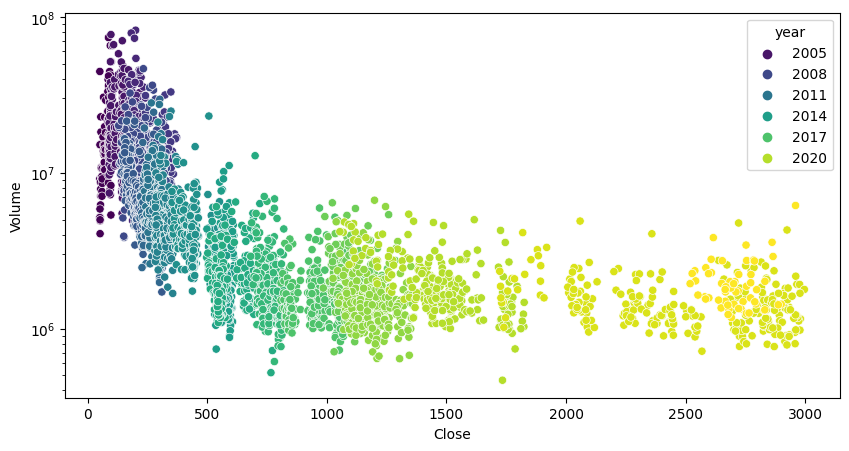

In [6]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='viridis')

We take a log plot in the volume direction here because the volatility of volume is so high early on. But yes, generally we see volume decrease over time as price rises.

Let's look at the synthetic quantity we calculated above: the daily dollar amount traded. It's hard to know what to expect here; from looking at the price x volume chart above we might expect to see an early regime, where the daily dollar amount traded decreases, and a later regime, where it increases. Let's see.

<Axes: xlabel='Date', ylabel='dollars'>

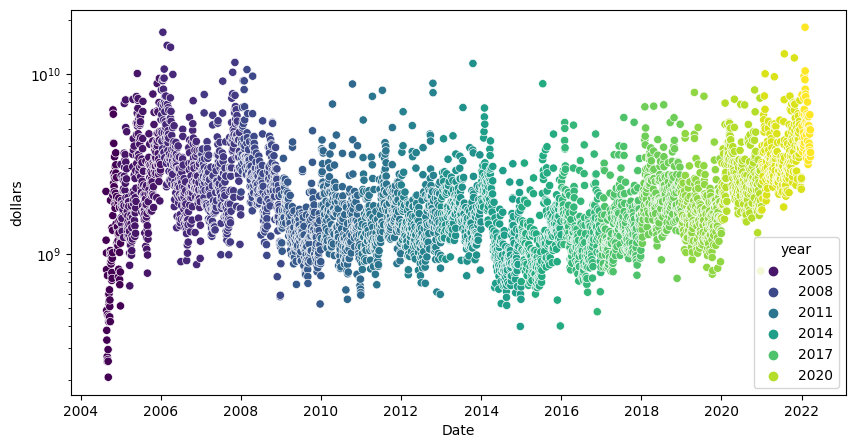

In [7]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', hue='year', palette='viridis')

Interestingly this curve is almost flat, but with three up-sloping sections. Maybe it will be clearler if we look at the monthly or quarterly average.

<Axes: xlabel='Date', ylabel='dollars'>

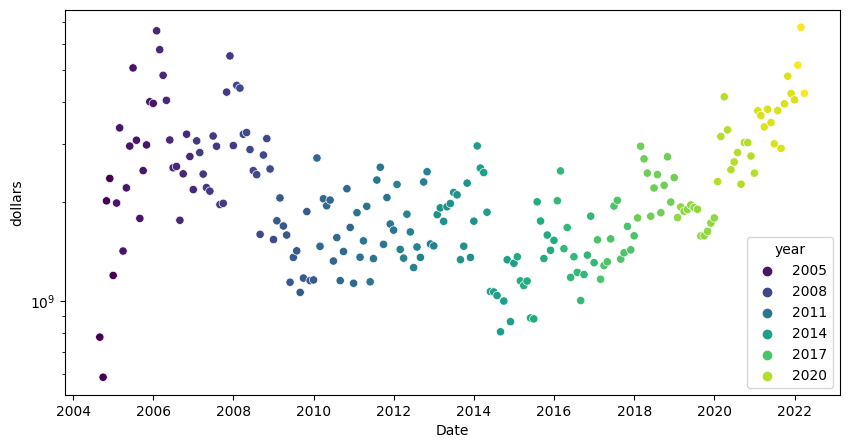

In [8]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df[['Date', 'dollars', 'year']].set_index('Date').resample('ME').mean().reset_index(), x='Date', y='dollars', hue='year', palette='viridis')

<Axes: xlabel='Date', ylabel='dollars'>

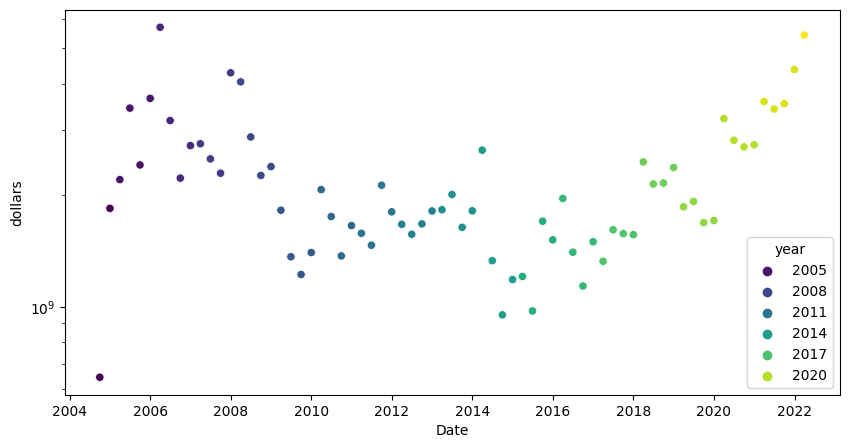

In [9]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df[['Date', 'dollars', 'year']].set_index('Date').resample('QE').mean().reset_index(), x='Date', y='dollars', hue='year', palette='viridis')

Oddly, in spite of price reversals toward the end of the period of interest we definitely see a strong upward trend over the last six or so years.